
# Exploración y ejecución del pipeline (Lab1)

In [ ]:

from pathlib import Path
import os, json

assert Path("params.yaml").exists(), "No se encontró params.yaml (ejecuta el notebook desde la raíz del repo)."
assert Path("src").exists(), "No se encontró el directorio src/."
print("Ok: estructura detectada.")

print("CWD:", os.getcwd())
print("Archivos:", [p for p in Path('.').iterdir() if p.is_file()][:10])
print("Carpetas:", [p for p in Path('.').iterdir() if p.is_dir()])



## 1) Ejecutar etapas del pipeline desde `src/`


In [ ]:

from src.preprocess import main as preprocess_main
from src.train import main as train_main
from src.evaluate import main as evaluate_main

preprocess_main("params.yaml")
train_main("params.yaml")
evaluate_main("params.yaml")

print("Etapas completadas. Revisa artifacts/, models/ y reports/.")



## 2) Métricas finales


In [1]:

import json, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

metrics_path = Path("artifacts/metrics.json")
if metrics_path.exists():
    with open(metrics_path, "r", encoding="utf-8") as f:
        metrics = json.load(f)
    display(pd.DataFrame([metrics]))
else:
    print("No se encontró artifacts/metrics.json. Ejecuta antes la celda de pipeline.")


,rmse,mae,r2
0,0.450742,0.312091,0.84742



## 3) Comparación de modelos (CV)


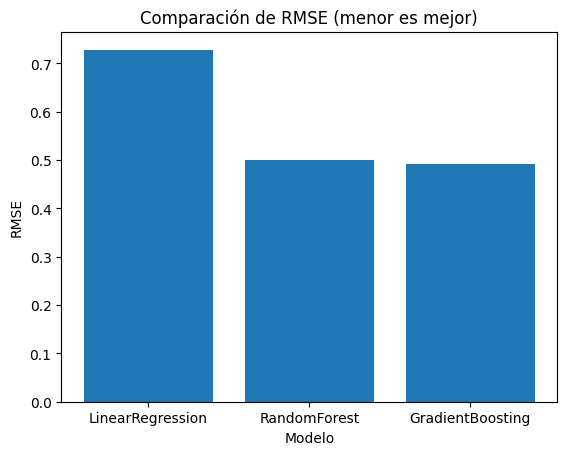

,name,best_score,best_params,RMSE
0,LinearRegression,-0.728251,{},0.728251
1,RandomForest,-0.500427,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.500427
2,GradientBoosting,-0.491359,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.491359


In [2]:

import json, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

summary_path = Path("artifacts/train_summary.json")
if summary_path.exists():
    with open(summary_path, "r", encoding="utf-8") as f:
        train_summary = json.load(f)
    df = pd.DataFrame(train_summary.get("results", []))
    if not df.empty and "best_score" in df.columns:
        scoring = train_summary.get("scoring", "")
        if "neg_root_mean_squared_error" in scoring:
            df["RMSE"] = df["best_score"].apply(lambda s: abs(float(s)))
            metric_col = "RMSE"
            title = "Comparación de RMSE (menor es mejor)"
        else:
            metric_col = "best_score"
            title = f"Comparación de {scoring} (mayor es mejor)"
        
        plt.figure()
        plt.bar(df["name"], df[metric_col])
        plt.title(title)
        plt.xlabel("Modelo")
        plt.ylabel(metric_col)
        plt.show()
        
        display(df)
    else:
        print("No hay resultados de CV para mostrar.")
else:
    print("No se encontró artifacts/train_summary.json. Ejecuta antes la celda de pipeline.")



## 4) Mejor modelo y parámetros óptimos


In [3]:

import json
from pathlib import Path

summary_path = Path("artifacts/train_summary.json")
if summary_path.exists():
    with open(summary_path, "r", encoding="utf-8") as f:
        train_summary = json.load(f)
    best = train_summary.get("best", {})
    print("Mejor modelo:", best.get("name"))
    print("Score:", best.get("score"))
    print("Mejores hiperparámetros:", best.get("best_params"))
else:
    print("No se encontró artifacts/train_summary.json.")


Mejor modelo: GradientBoosting
Score: -0.491358615399706
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
